## Section 1. Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings

In [ ]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Section 2. Load Dataset

In [2]:
# TO DO: Read CSV file
df = pd.read_csv('AirlineSatisfaction.csv')
# TO DO: Display first few rows of the dataframe
df.iloc[0:10]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


## Section 3. EDA

(25976, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 n

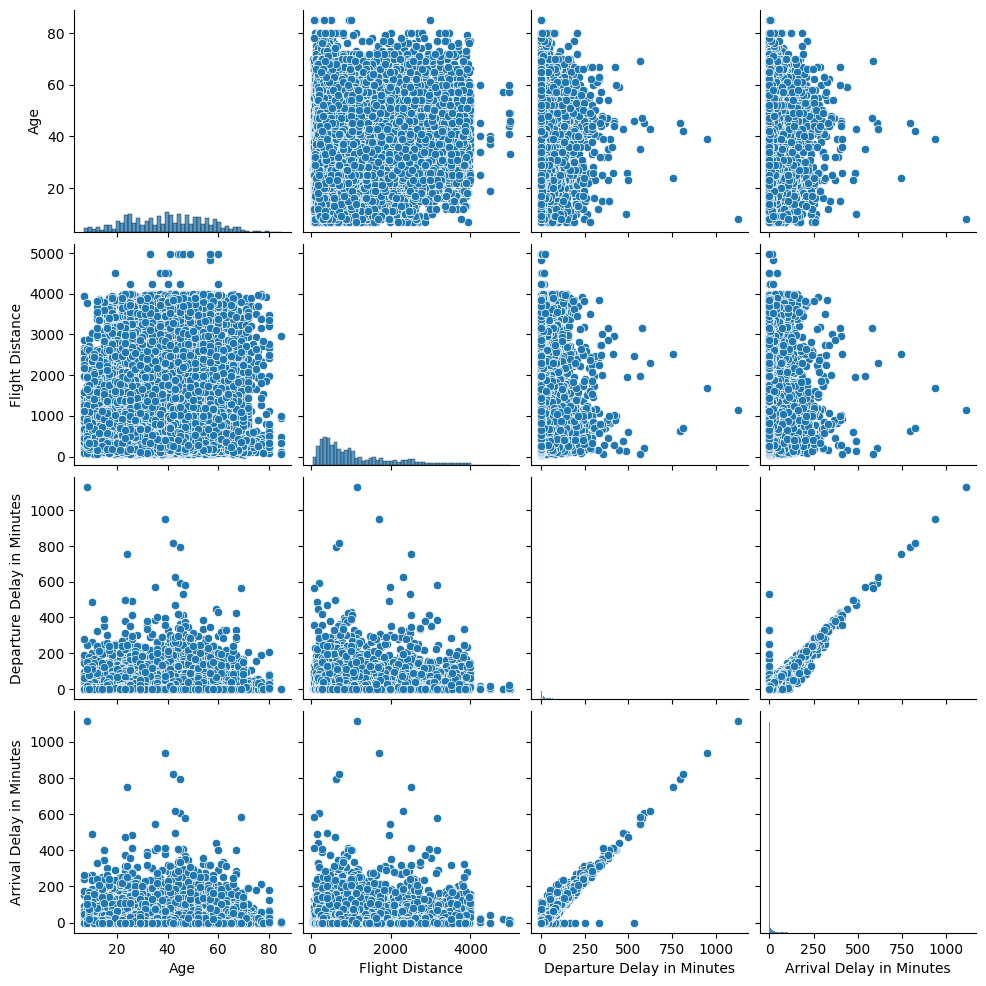

In [3]:
# TODO: Print the shape of the data
print(df.shape)
# TODO: Print the information about the dataframe
print(df.info())
# TODO Display the summary statistics of the dataframe
print(df.describe())
# Removing unnecesary columns
df=df.drop(['Unnamed: 0','id','Gender', 'Customer Type','Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction'],axis=1)
# TODO: Replace any NaN values in the dataframe with 0
df = df.fillna(0)
# TODO: Print the number of NaN values in each column of the dataframe
print(df.isna().sum())
# TO DO: Create a pairplot using Seaborn library
sns.pairplot(df)

## Section 5. Model Building | Training

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

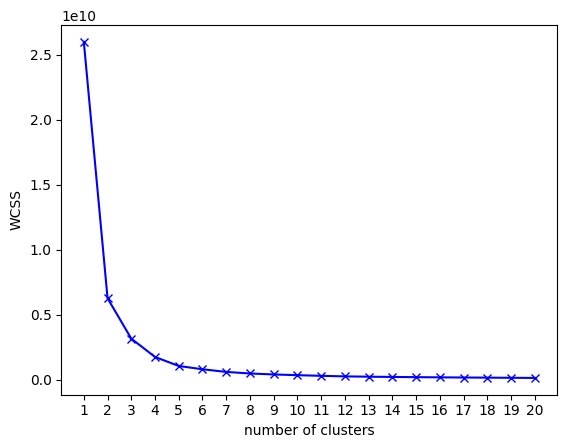

In [6]:
# TO DO: Implement the elbow method to determine the optimal number of clusters
# TO DO: Create a KMeans model for each number of clusters from 1 to 20
# TO DO: Fit the KMeans model to the data and append the within-cluster sum of squares (WCSS) to a list
WCSS = []
K = range(1,21)
for n in K :
    km = KMeans(n_clusters=n)
    km.fit(df)
    WCSS.append(km.inertia_)

# TO DO: Plot the WCSS for each number of clusters
plt.plot(K,WCSS,'bx-')
plt.xlabel('number of clusters')
plt.xticks(K, K)
plt.ylabel('WCSS')
plt.show()

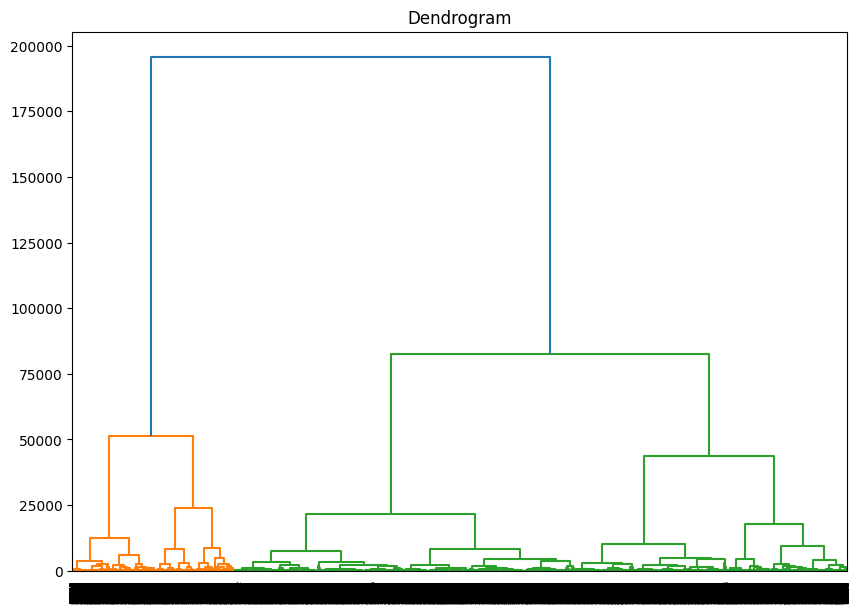

In [5]:
# TO DO: Create a dendrogram using hierarchical clustering
# TO DO: Use the ward method to calculate linkage
Z = sch.linkage(df, 'ward')
# TO DO: Plot the dendrogram
plt.figure(figsize=(15, 8))
plt.title("Dendrogram")
sch.dendrogram(Z)
plt.show()

## Section 6. K Means Clustering

In [7]:
# TO DO: Create a KMeans model with the best number of clusters
best = 4
#from the section 5 this is choosen as the best number
KMeans = KMeans(n_clusters=best)
# TO DO: Fit the KMeans model to the data and assign the resulting
# cluster labels to a new column in the dataframe
KMeans.fit(df)

df['cluster_labels'] = KMeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Section 7. Agglomerative Clustering

In [9]:
# TO DO: Create an Agglomerative Clustering model with the best number of clusters
# using the Euclidean distance metric and ward linkage
AgglomerativeClustering = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=best)
# TO DO: Fit the Agglomerative Clustering model to the data and assign
# the resulting cluster labels to a new column in the dataframe
AgglomerativeClustering.fit(df)
df["cluster_labels_Agglomerative"] = AgglomerativeClustering.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Section 8. Clusters Visualization

In [10]:
# TO DO: Remove outliers from the dataframe to improve visualization
print(df.shape)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(25976, 6)
(21306, 6)


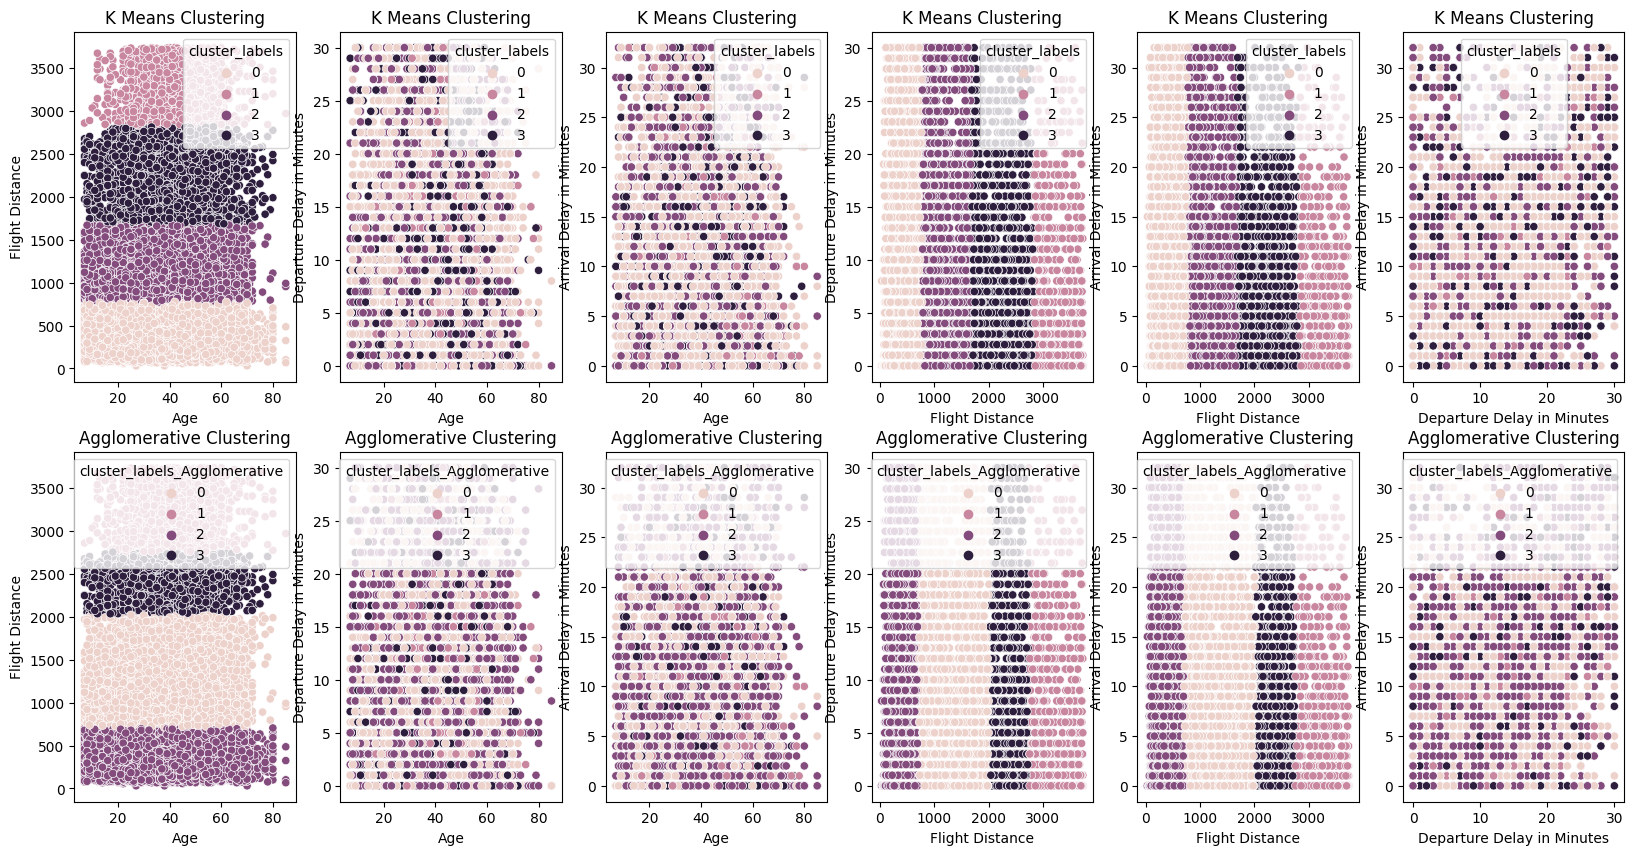

In [11]:
# TO DO: Create a scatter plot with subplots for each clustering method
# TO DO: Plot the data points for each cluster in a different color and label the clusters accordingly

fig, axs = plt.subplots(2, 6,  figsize=(20, 10))

sns.scatterplot(data=df, x="Age", y="Flight Distance", hue="cluster_labels", ax=axs[0,0])
axs[0,0].set_title("K Means Clustering")
sns.scatterplot(data=df, x="Age", y="Departure Delay in Minutes", hue="cluster_labels", ax=axs[0,1])
axs[0,1].set_title("K Means Clustering")
sns.scatterplot(data=df, x="Age", y="Arrival Delay in Minutes", hue="cluster_labels", ax=axs[0,2])
axs[0,2].set_title("K Means Clustering")
sns.scatterplot(data=df, x="Flight Distance", y="Departure Delay in Minutes", hue="cluster_labels", ax=axs[0,3])
axs[0,3].set_title("K Means Clustering")
sns.scatterplot(data=df, x="Flight Distance", y="Arrival Delay in Minutes", hue="cluster_labels", ax=axs[0,4])
axs[0,4].set_title("K Means Clustering")
sns.scatterplot(data=df, x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue="cluster_labels", ax=axs[0,5])
axs[0,5].set_title("K Means Clustering")

sns.scatterplot(data=df, x="Age", y="Flight Distance", hue="cluster_labels_Agglomerative", ax=axs[1,0])
axs[1,0].set_title("Agglomerative Clustering")
sns.scatterplot(data=df, x="Age", y="Departure Delay in Minutes", hue="cluster_labels_Agglomerative", ax=axs[1,1])
axs[1,1].set_title("Agglomerative Clustering")
sns.scatterplot(data=df, x="Age", y="Arrival Delay in Minutes", hue="cluster_labels_Agglomerative", ax=axs[1,2])
axs[1,2].set_title("Agglomerative Clustering")
sns.scatterplot(data=df, x="Flight Distance", y="Departure Delay in Minutes", hue="cluster_labels_Agglomerative", ax=axs[1,3])
axs[1,3].set_title("Agglomerative Clustering")
sns.scatterplot(data=df, x="Flight Distance", y="Arrival Delay in Minutes", hue="cluster_labels_Agglomerative", ax=axs[1,4])
axs[1,4].set_title("Agglomerative Clustering")
sns.scatterplot(data=df, x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue="cluster_labels_Agglomerative", ax=axs[1,5])
axs[1,5].set_title("Agglomerative Clustering")

plt.show()